In [110]:
# Import necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA

# Import machine learning models
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Import visualization tools from Yellowbrick
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC


In [2]:
train_data = pd.read_csv('Dataset/train.csv', index_col='PassengerId')
test_data = pd.read_csv('Dataset/test.csv', index_col='PassengerId')

In [3]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
test_data.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
train_data.isna().sum() 

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
test_data.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [8]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

In [9]:
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

In [10]:
na_train_percentage = [(col, train_data[col].isna().sum() / len(train_data) * 100) for col in train_data.columns]
na_train_percentage = pd.DataFrame(na_train_percentage, columns=['Column', 'Percentage']).sort_values(by='Percentage', ascending=False)
na_train_percentage

,Column,Percentage
9,Cabin,77.104377
4,Age,19.865320
0,Survived,0.000000
1,Pclass,0.000000
2,Name,0.000000
3,Sex,0.000000
5,SibSp,0.000000
6,Parch,0.000000
7,Ticket,0.000000
8,Fare,0.000000


- here we can see that the column `Cabin` has 77% missing values so we can drop it

In [11]:
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

In [12]:
train_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

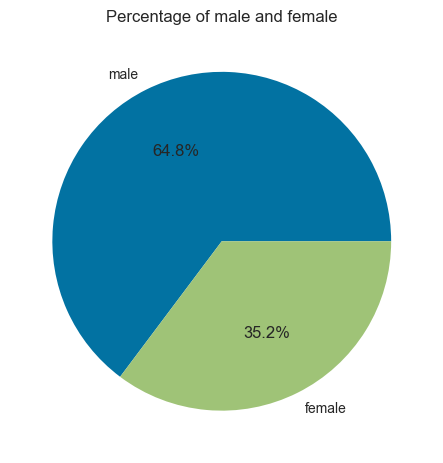

In [13]:
plt.pie(train_data['Sex'].value_counts(), labels=['male', 'female'], autopct='%1.1f%%')
plt.title('Percentage of male and female')
plt.show()

In [14]:
train_data.groupby('Survived')['Sex'].value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: count, dtype: int64

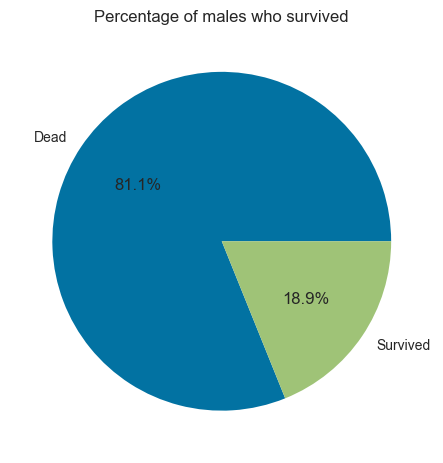

In [15]:
plt.pie(train_data[train_data['Sex'] == 'male'].groupby('Survived')['Name'].count(), labels=['Dead', 'Survived'], autopct='%1.1f%%')
plt.title('Percentage of males who survived')
plt.show()

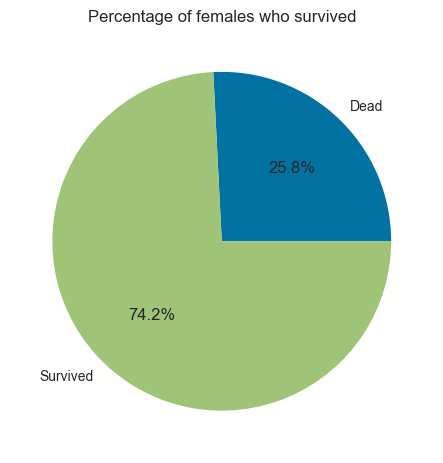

In [16]:
plt.pie(train_data[train_data['Sex'] == 'female'].groupby('Survived')['Name'].count(), labels=['Dead', 'Survived'], autopct='%1.1f%%')
plt.title('Percentage of females who survived')
plt.show()

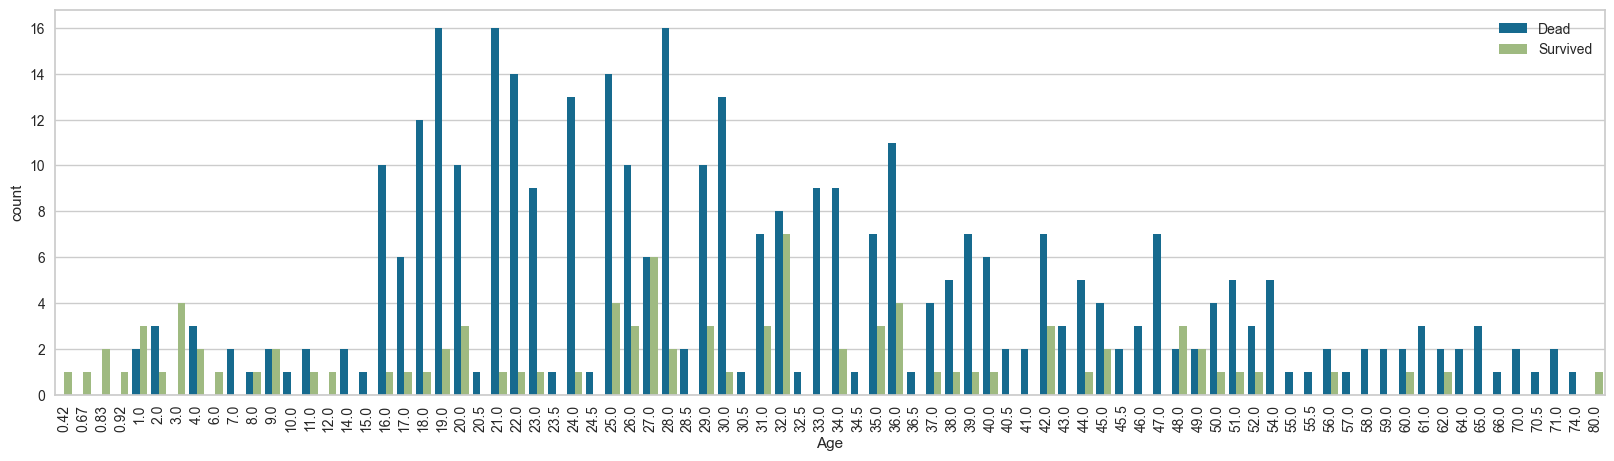

In [17]:
plt.figure(figsize=(20,5))
sns.countplot(data= train_data[(train_data['Sex'] == 'male')], x='Age',hue='Survived')
plt.legend(['Dead', 'Survived'])
plt.xticks(rotation=90)
plt.show()

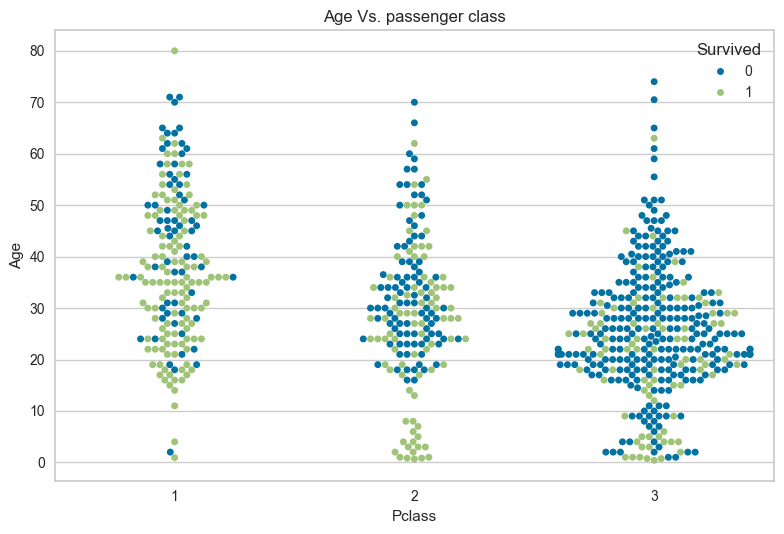

In [18]:

sns.swarmplot(data = train_data, x='Pclass', y='Age', hue='Survived')
plt.title('Age Vs. passenger class')
plt.tight_layout()
plt.show()

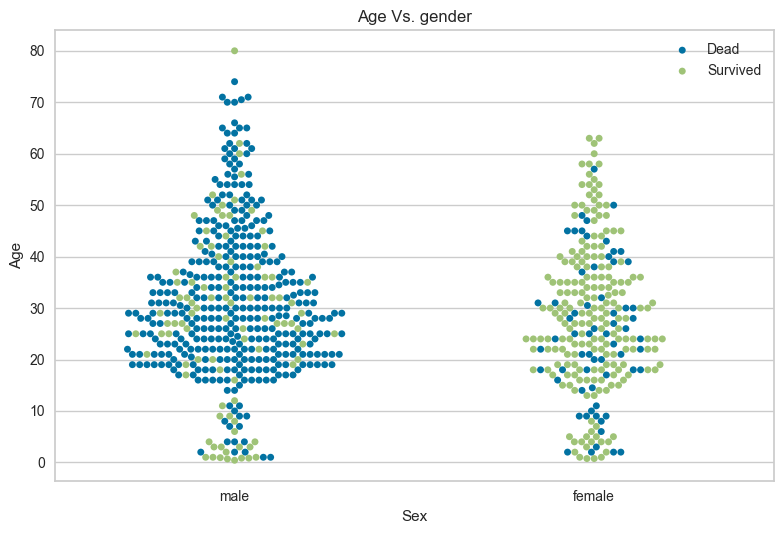

In [19]:
sns.swarmplot(data = train_data, x='Sex', y='Age', hue='Survived')
plt.legend(['Dead', 'Survived'])
plt.title('Age Vs. gender')
plt.tight_layout()
plt.show()

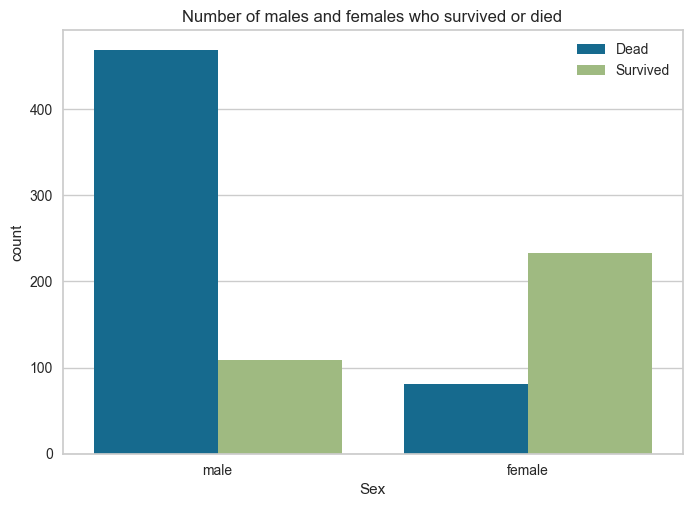

In [20]:
sns.countplot(data= train_data, x='Sex',hue='Survived')
plt.title('Number of males and females who survived or died')
plt.legend(['Dead', 'Survived'])
plt.show()

In [21]:
train_data.groupby(['Sex', 'Pclass', 'Survived'])['Name'].count()

Sex     Pclass  Survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Name, dtype: int64

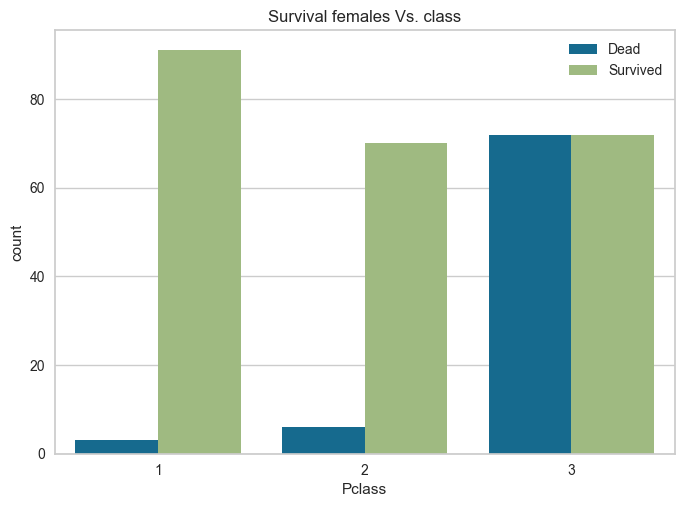

In [22]:
sns.countplot(data= train_data[train_data['Sex']=='female'], x='Pclass',hue='Survived')
plt.title('Survival females Vs. class')
plt.legend(['Dead', 'Survived'])
plt.show()

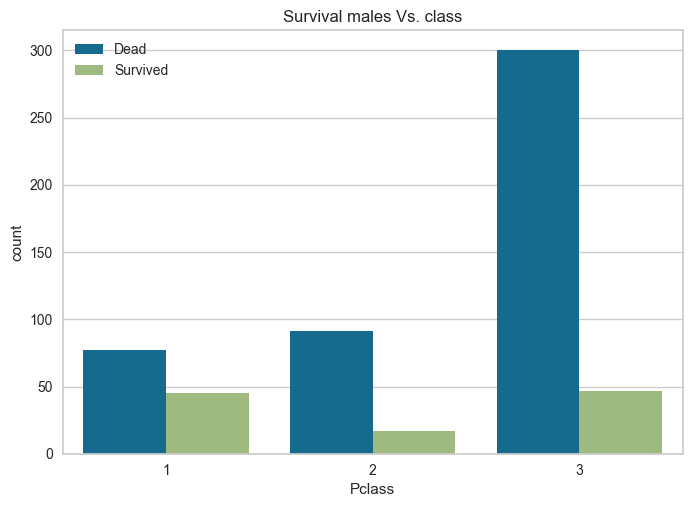

In [23]:
sns.countplot(data= train_data[train_data['Sex']=='male'], x='Pclass',hue='Survived')
plt.title('Survival males Vs. class')
plt.legend(['Dead', 'Survived'])
plt.show()

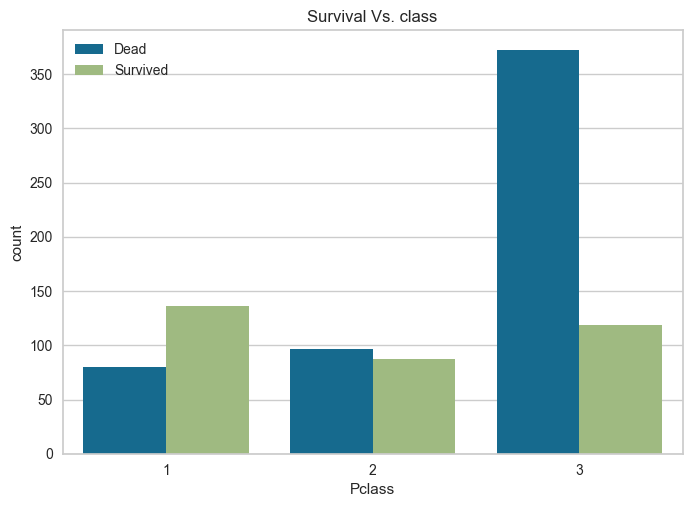

In [24]:
sns.countplot(data= train_data, x='Pclass',hue='Survived')
plt.title('Survival Vs. class')
plt.legend(['Dead', 'Survived'])
plt.show()

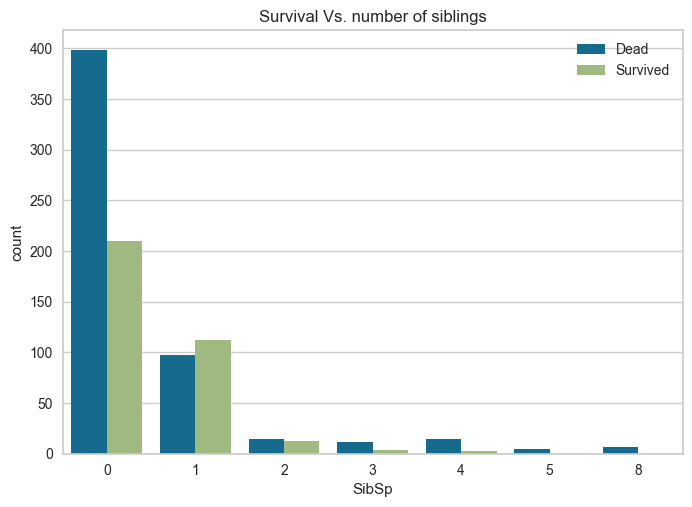

In [25]:
sns.countplot(data= train_data, x='SibSp',hue='Survived')
plt.title('Survival Vs. number of siblings')
plt.legend(['Dead', 'Survived'])
plt.show()

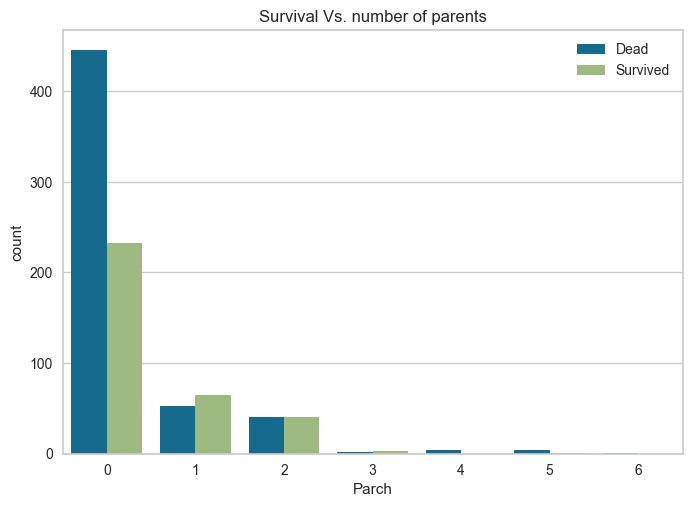

In [26]:
sns.countplot(data= train_data, x='Parch',hue='Survived')
plt.title('Survival Vs. number of parents')
plt.legend(['Dead', 'Survived'])
plt.show()

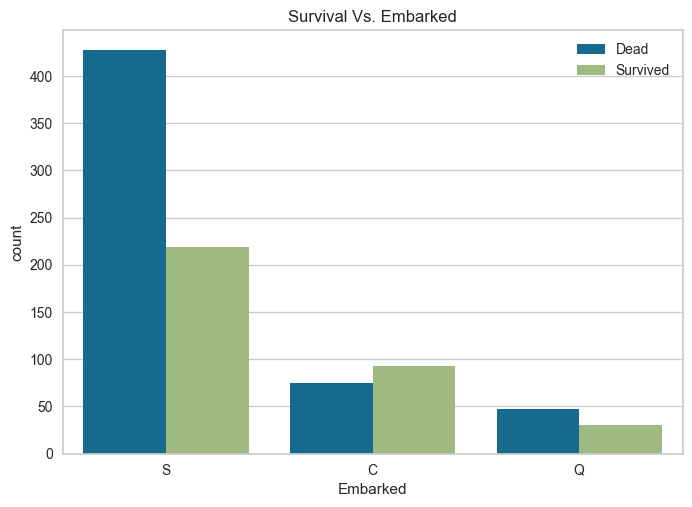

In [27]:
sns.countplot(data= train_data, x='Embarked',hue='Survived')
plt.title('Survival Vs. Embarked')
plt.legend(['Dead', 'Survived'])
plt.show()

In [28]:
train_data.groupby('Embarked')['Sex'].value_counts(sort=False)

Embarked  Sex   
C         female     73
          male       95
Q         female     36
          male       41
S         female    205
          male      441
Name: count, dtype: int64

In [29]:
train_data.groupby('Embarked')['Pclass'].value_counts(sort=False)

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         129
          2         164
          3         353
Name: count, dtype: int64

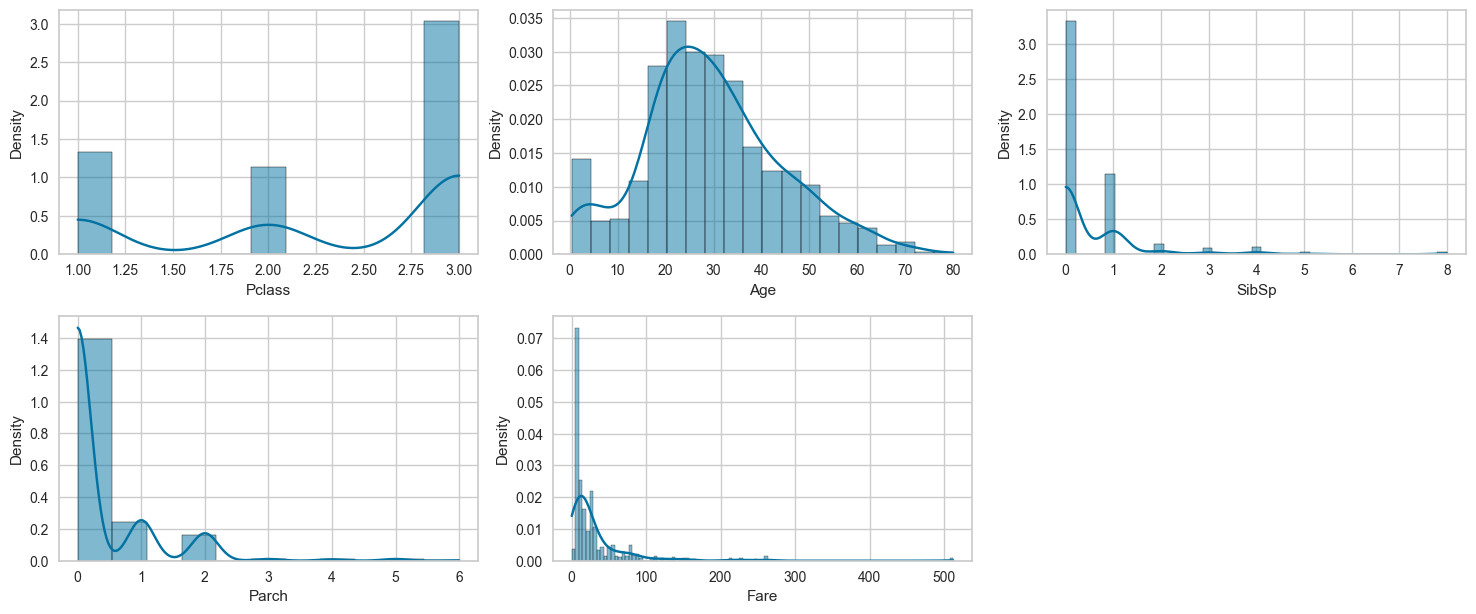

In [30]:
plt.figure(figsize=(15, 12))
cols = train_data.select_dtypes(exclude='object').columns.drop(['Survived'])
for i, c in enumerate(cols):
    plt.subplot(4, 3, i+1)
    sns.histplot(train_data[c], stat='density', kde=True)
plt.tight_layout()
plt.show()

<Axes: xlabel='Fare', ylabel='Count'>

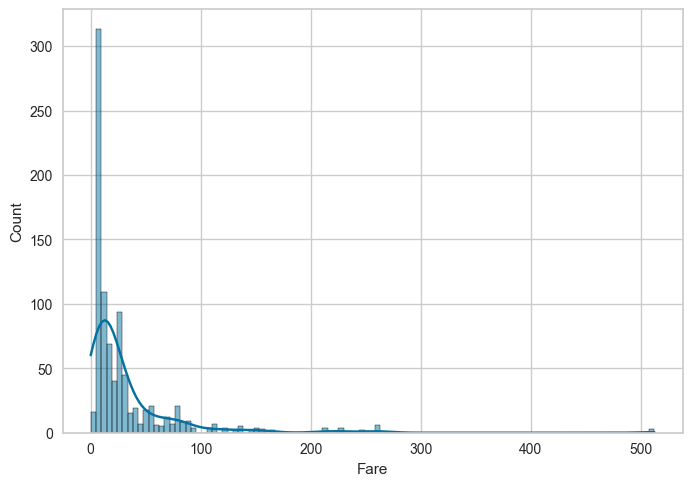

In [31]:
sns.histplot(data=train_data['Fare'], kde=True)

<Axes: xlabel='Fare', ylabel='Count'>

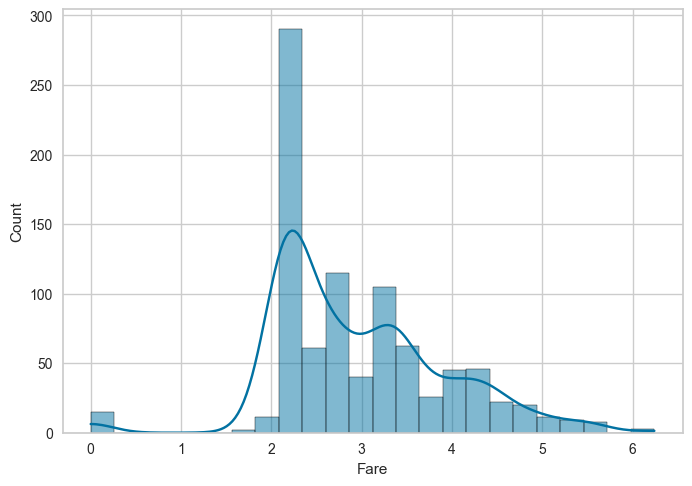

In [32]:
sns.histplot(np.log1p(train_data['Fare']), kde=True)

In [33]:
train_data['Fare'] = np.log1p(train_data['Fare'])
test_data['Fare'] = np.log1p(test_data['Fare'])

In [34]:
def extract_title(name:str):
    return name.split(',')[1].split('.')[0]

In [35]:
train_data['Name'].apply(lambda x:extract_title(x))

PassengerId
1         Mr
2        Mrs
3       Miss
4        Mrs
5         Mr
       ...  
887      Rev
888     Miss
889     Miss
890       Mr
891       Mr
Name: Name, Length: 891, dtype: object

In [36]:
titles = {}
for n in train_data['Name']:
    if n.split(',')[1].split('.')[0] not in titles.keys():
        titles[n.split(',')[1].split('.')[0]] = 1
    else:
        titles[n.split(',')[1].split('.')[0]]+=1
        
titles

{' Mr': 517,
 ' Mrs': 125,
 ' Miss': 182,
 ' Master': 40,
 ' Don': 1,
 ' Rev': 6,
 ' Dr': 7,
 ' Mme': 1,
 ' Ms': 1,
 ' Major': 2,
 ' Lady': 1,
 ' Sir': 1,
 ' Mlle': 2,
 ' Col': 2,
 ' Capt': 1,
 ' the Countess': 1,
 ' Jonkheer': 1}

In [37]:
titles['other'] = 0

In [38]:
for k, v in titles.items():
    if v < 20:
        titles['other'] += v
        
titles

{' Mr': 517,
 ' Mrs': 125,
 ' Miss': 182,
 ' Master': 40,
 ' Don': 1,
 ' Rev': 6,
 ' Dr': 7,
 ' Mme': 1,
 ' Ms': 1,
 ' Major': 2,
 ' Lady': 1,
 ' Sir': 1,
 ' Mlle': 2,
 ' Col': 2,
 ' Capt': 1,
 ' the Countess': 1,
 ' Jonkheer': 1,
 'other': 27}

In [39]:
new_titles = {}
for k,v in titles.items():
    if v >20:
        new_titles[k] = v
new_titles

{' Mr': 517, ' Mrs': 125, ' Miss': 182, ' Master': 40, 'other': 27}

In [40]:
def extract_title(name:str):
    if name.split(',')[1].split('.')[0] not in new_titles.keys():
        return 'other'
    else:
        return name.split(',')[1].split('.')[0]

In [41]:
train_data['Title'] = train_data['Name'].apply(lambda x: extract_title(x))
train_data['Title']

PassengerId
1         Mr
2        Mrs
3       Miss
4        Mrs
5         Mr
       ...  
887    other
888     Miss
889     Miss
890       Mr
891       Mr
Name: Title, Length: 891, dtype: object

In [42]:
train_data['Title'].value_counts()

Title
 Mr        517
 Miss      182
 Mrs       125
 Master     40
other       27
Name: count, dtype: int64

<Axes: xlabel='Title', ylabel='count'>

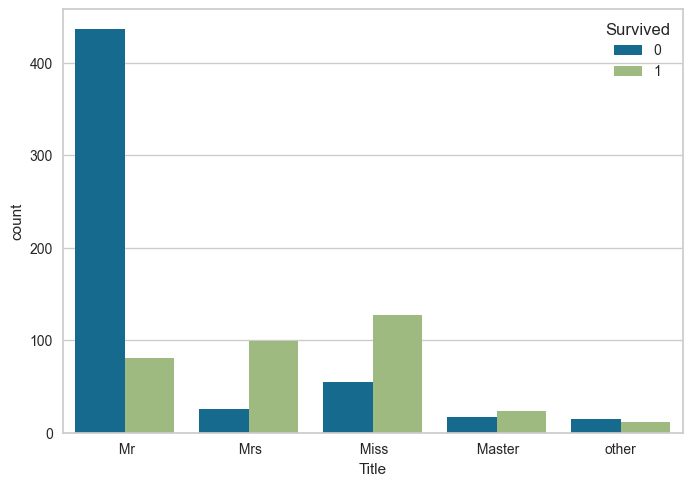

In [43]:
sns.countplot(data= train_data, x='Title',hue='Survived')

In [44]:
train_data['Title'] = train_data['Title'].map({' Mr': 0, ' Miss': 1, ' Mrs': 2, ' Master': 3, 'other': 4})

In [45]:
test_data['Title'] = test_data['Name'].apply(lambda x: extract_title(x))
test_data['Title'] = test_data['Title'].map({' Mr': 0, ' Miss': 1, ' Mrs': 2, ' Master': 3, 'other': 4})
test_data['Title']

PassengerId
892     0
893     2
894     0
895     0
896     2
       ..
1305    0
1306    4
1307    0
1308    0
1309    3
Name: Title, Length: 418, dtype: int64

In [46]:
train_data.drop('Name', axis=1, inplace=True)
test_data.drop('Name', axis=1, inplace=True)

In [47]:
train_data = pd.concat([train_data, pd.get_dummies(train_data['Sex'])], axis=1)
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,female,male
PassengerId,,,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,2.110213,S,0,False,True
2,1,1,female,38.0,1,0,PC 17599,4.280593,C,2,True,False
3,1,3,female,26.0,0,0,STON/O2. 3101282,2.188856,S,1,True,False
4,1,1,female,35.0,1,0,113803,3.990834,S,2,True,False
5,0,3,male,35.0,0,0,373450,2.202765,S,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,211536,2.639057,S,4,False,True
888,1,1,female,19.0,0,0,112053,3.433987,S,1,True,False
889,0,3,female,NaN,1,2,W./C. 6607,3.196630,S,1,True,False


In [48]:
test_data = pd.concat([test_data, pd.get_dummies(test_data['Sex'])], axis=1) 
test_data

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,female,male
PassengerId,,,,,,,,,,,
892,3,male,34.5,0,0,330911,2.178064,Q,0,False,True
893,3,female,47.0,1,0,363272,2.079442,S,2,True,False
894,2,male,62.0,0,0,240276,2.369075,Q,0,False,True
895,3,male,27.0,0,0,315154,2.268252,S,0,False,True
896,3,female,22.0,1,1,3101298,2.586824,S,2,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1305,3,male,NaN,0,0,A.5. 3236,2.202765,S,0,False,True
1306,1,female,39.0,0,0,PC 17758,4.699571,C,4,True,False
1307,3,male,38.5,0,0,SOTON/O.Q. 3101262,2.110213,S,0,False,True


In [49]:
train_data.drop(['Sex', 'Ticket'], axis=1, inplace=True)
test_data.drop(['Sex', 'Ticket'], axis=1, inplace=True)

In [50]:
train_data['Embarked'] = train_data['Embarked'].map({'S':0, 'C': 1, 'Q':2})
test_data['Embarked'] = test_data['Embarked'].map({'S':0, 'C': 1, 'Q':2})

<Axes: xlabel='Age', ylabel='Count'>

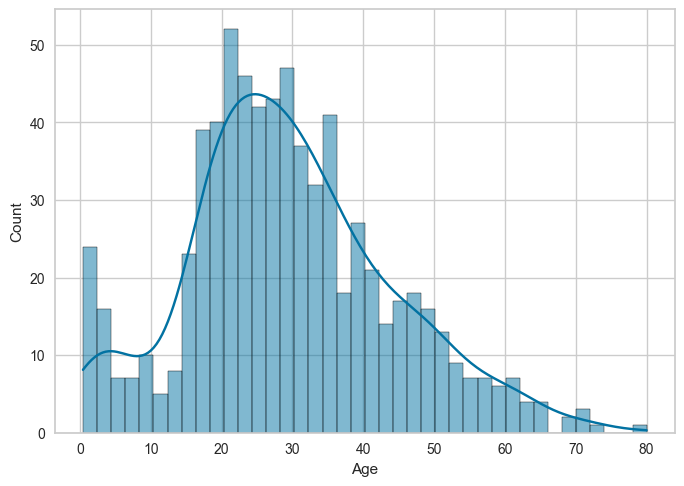

In [51]:
sns.histplot(train_data['Age'], kde=True, bins=40)

In [52]:
train_data['Age'].median()

28.0

In [53]:
imputer = KNNImputer(n_neighbors=8)
X_imputed = imputer.fit_transform(train_data)
X_imputed = pd.DataFrame(X_imputed, columns=train_data.columns)

In [54]:
test_data.isna().sum()

Pclass       0
Age         86
SibSp        0
Parch        0
Fare         0
Embarked     0
Title        0
female       0
male         0
dtype: int64

In [55]:
test_data['Survived'] = 0 #to impute the missing values

In [56]:
# sort feature in test like train
test_data = test_data[train_data.columns]
test_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,female,male
PassengerId,,,,,,,,,,
892,0,3,34.5,0,0,2.178064,2,0,False,True
893,0,3,47.0,1,0,2.079442,0,2,True,False
894,0,2,62.0,0,0,2.369075,2,0,False,True
895,0,3,27.0,0,0,2.268252,0,0,False,True
896,0,3,22.0,1,1,2.586824,0,2,True,False
...,...,...,...,...,...,...,...,...,...,...
1305,0,3,NaN,0,0,2.202765,0,0,False,True
1306,0,1,39.0,0,0,4.699571,1,4,True,False
1307,0,3,38.5,0,0,2.110213,0,0,False,True


In [57]:
X_test_imputed = imputer.transform(test_data)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=test_data.columns)
X_test_imputed

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,female,male
0,0.0,3.0,34.5000,0.0,0.0,2.178064,2.0,0.0,0.0,1.0
1,0.0,3.0,47.0000,1.0,0.0,2.079442,0.0,2.0,1.0,0.0
2,0.0,2.0,62.0000,0.0,0.0,2.369075,2.0,0.0,0.0,1.0
3,0.0,3.0,27.0000,0.0,0.0,2.268252,0.0,0.0,0.0,1.0
4,0.0,3.0,22.0000,1.0,1.0,2.586824,0.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
413,0.0,3.0,36.2500,0.0,0.0,2.202765,0.0,0.0,0.0,1.0
414,0.0,1.0,39.0000,0.0,0.0,4.699571,1.0,4.0,1.0,0.0
415,0.0,3.0,38.5000,0.0,0.0,2.110213,0.0,0.0,0.0,1.0
416,0.0,3.0,36.2500,0.0,0.0,2.202765,0.0,0.0,0.0,1.0


In [58]:
X_imputed.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Title', 'female', 'male'],
      dtype='object')

In [59]:
X_imputed = pd.concat((X_imputed, pd.get_dummies(X_imputed['Title'])), axis=1)
X_imputed.columns = pd.Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Title', 'female', 'male', 'Mr', 'Miss', 'Mrs', 'Master', 'other'])
X_imputed.drop('Title', axis=1, inplace=True)
X_imputed

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male,Mr,Miss,Mrs,Master,other
0,0.0,3.0,22.0,1.0,0.0,2.110213,0.0,0.0,1.0,True,False,False,False,False
1,1.0,1.0,38.0,1.0,0.0,4.280593,1.0,1.0,0.0,False,False,True,False,False
2,1.0,3.0,26.0,0.0,0.0,2.188856,0.0,1.0,0.0,False,True,False,False,False
3,1.0,1.0,35.0,1.0,0.0,3.990834,0.0,1.0,0.0,False,False,True,False,False
4,0.0,3.0,35.0,0.0,0.0,2.202765,0.0,0.0,1.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,27.0,0.0,0.0,2.639057,0.0,0.0,1.0,False,False,False,False,True
887,1.0,1.0,19.0,0.0,0.0,3.433987,0.0,1.0,0.0,False,True,False,False,False
888,0.0,3.0,15.5,1.0,2.0,3.196630,0.0,1.0,0.0,False,True,False,False,False
889,1.0,1.0,26.0,0.0,0.0,3.433987,1.0,0.0,1.0,True,False,False,False,False


In [60]:
#test
X_test_imputed = pd.concat((X_test_imputed, pd.get_dummies(X_test_imputed['Title'])), axis=1)
X_test_imputed.columns = pd.Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Title', 'female', 'male', 'Mr', 'Miss', 'Mrs', 'Master', 'other'])
X_test_imputed.drop('Title', axis=1, inplace=True)
X_test_imputed

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male,Mr,Miss,Mrs,Master,other
0,0.0,3.0,34.5000,0.0,0.0,2.178064,2.0,0.0,1.0,True,False,False,False,False
1,0.0,3.0,47.0000,1.0,0.0,2.079442,0.0,1.0,0.0,False,False,True,False,False
2,0.0,2.0,62.0000,0.0,0.0,2.369075,2.0,0.0,1.0,True,False,False,False,False
3,0.0,3.0,27.0000,0.0,0.0,2.268252,0.0,0.0,1.0,True,False,False,False,False
4,0.0,3.0,22.0000,1.0,1.0,2.586824,0.0,1.0,0.0,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.0,3.0,36.2500,0.0,0.0,2.202765,0.0,0.0,1.0,True,False,False,False,False
414,0.0,1.0,39.0000,0.0,0.0,4.699571,1.0,1.0,0.0,False,False,False,False,True
415,0.0,3.0,38.5000,0.0,0.0,2.110213,0.0,0.0,1.0,True,False,False,False,False
416,0.0,3.0,36.2500,0.0,0.0,2.202765,0.0,0.0,1.0,True,False,False,False,False


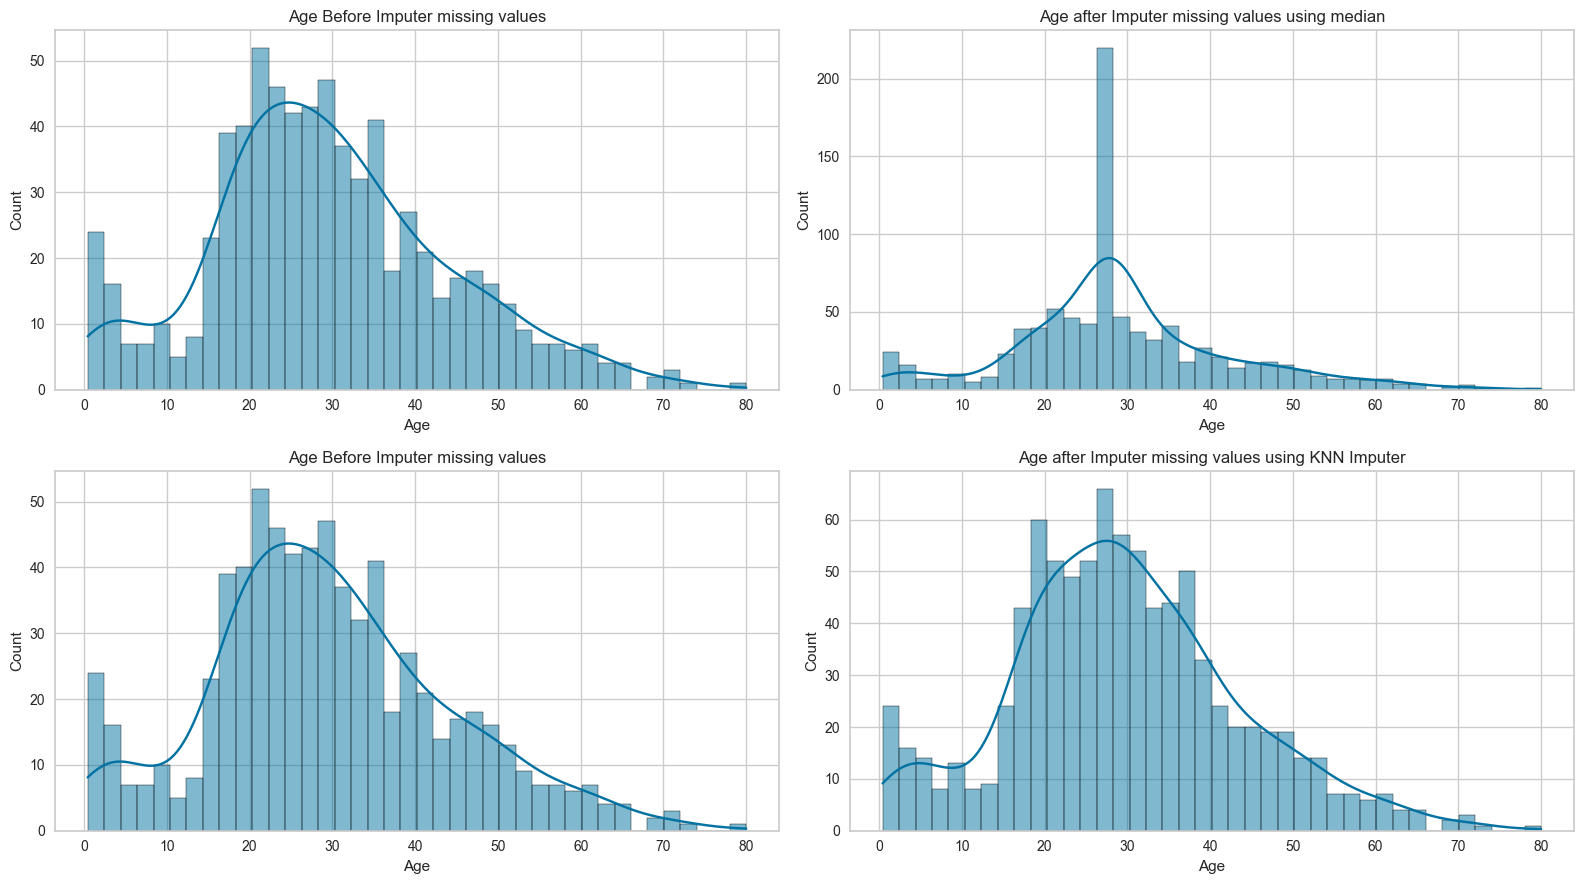

In [61]:
plt.figure(figsize=(16, 9))
plt.subplot(2, 2, 1).set_title('Age Before Imputer missing values')
sns.histplot(train_data['Age'], kde=True, bins=40)

plt.subplot(2, 2, 2).set_title('Age after Imputer missing values using median')
sns.histplot(train_data['Age'].fillna(train_data['Age'].median()), kde=True, bins=40)

plt.subplot(2, 2, 3).set_title('Age Before Imputer missing values')
sns.histplot(train_data['Age'], kde=True, bins=40)

plt.subplot(2, 2, 4).set_title('Age after Imputer missing values using KNN Imputer')
sns.histplot(X_imputed['Age'], kde=True, bins=40)

plt.tight_layout()
plt.show()

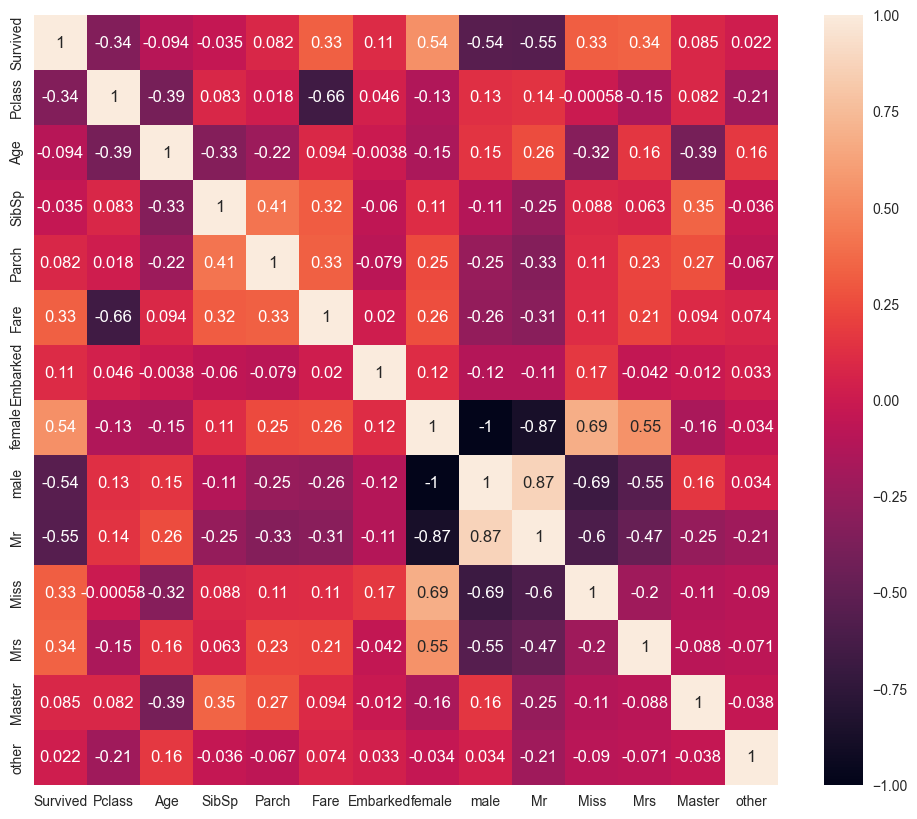

In [62]:
plt.figure(figsize=(12, 10))
sns.heatmap(X_imputed.corr(), annot=True)
plt.show()

In [63]:
X_train_scaled = X_imputed.copy()
scaler = MinMaxScaler()
X_train_scaled[['Age', 'Fare']] = scaler.fit_transform(X_imputed[['Age', 'Fare']])
X_train_scaled

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male,Mr,Miss,Mrs,Master,other
0,0.0,3.0,0.271174,1.0,0.0,0.338125,0.0,0.0,1.0,True,False,False,False,False
1,1.0,1.0,0.472229,1.0,0.0,0.685892,1.0,1.0,0.0,False,False,True,False,False
2,1.0,3.0,0.321438,0.0,0.0,0.350727,0.0,1.0,0.0,False,True,False,False,False
3,1.0,1.0,0.434531,1.0,0.0,0.639463,0.0,1.0,0.0,False,False,True,False,False
4,0.0,3.0,0.434531,0.0,0.0,0.352955,0.0,0.0,1.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,0.334004,0.0,0.0,0.422864,0.0,0.0,1.0,False,False,False,False,True
887,1.0,1.0,0.233476,0.0,0.0,0.550238,0.0,1.0,0.0,False,True,False,False,False
888,0.0,3.0,0.189495,1.0,2.0,0.512205,0.0,1.0,0.0,False,True,False,False,False
889,1.0,1.0,0.321438,0.0,0.0,0.550238,1.0,0.0,1.0,True,False,False,False,False


In [64]:
X_test_scaled = X_test_imputed.copy()
X_test_scaled[['Age', 'Fare']] = scaler.transform(X_test_imputed[['Age', 'Fare']])
X_test_scaled

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male,Mr,Miss,Mrs,Master,other
0,0.0,3.0,0.428248,0.0,0.0,0.348997,2.0,0.0,1.0,True,False,False,False,False
1,0.0,3.0,0.585323,1.0,0.0,0.333195,0.0,1.0,0.0,False,False,True,False,False
2,0.0,2.0,0.773813,0.0,0.0,0.379604,2.0,0.0,1.0,True,False,False,False,False
3,0.0,3.0,0.334004,0.0,0.0,0.363449,0.0,0.0,1.0,True,False,False,False,False
4,0.0,3.0,0.271174,1.0,1.0,0.414494,0.0,1.0,0.0,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.0,3.0,0.450239,0.0,0.0,0.352955,0.0,0.0,1.0,True,False,False,False,False
414,0.0,1.0,0.484795,0.0,0.0,0.753026,1.0,1.0,0.0,False,False,False,False,True
415,0.0,3.0,0.478512,0.0,0.0,0.338125,0.0,0.0,1.0,True,False,False,False,False
416,0.0,3.0,0.450239,0.0,0.0,0.352955,0.0,0.0,1.0,True,False,False,False,False


In [65]:
#split the data into train validation and test
X_train, X_temp, y_train, y_temp = train_test_split(X_imputed.drop(['Survived', 'other'], axis = 1), X_imputed['Survived'],train_size=0.7, test_size=0.3,shuffle=False)

X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp,train_size=0.5, test_size=0.5, shuffle=False)

In [66]:
svm = LinearSVC(C=0.1, dual=False)

svm.fit(X_train, y_train)

print(f"Validation Accuracy: {svm.score(X_valid, y_valid):.2f}")

print(f"Test Accuracy: {svm.score(X_test, y_test):.2f}")


Validation Accuracy: 0.84
Test Accuracy: 0.87


In [67]:
svm_score = [[], []]
for i in range(1, 11):
    svm = LinearSVC(C=i/10, dual=False)
    svm.fit(X_train, y_train)
    svm_score[0].append(svm.score(X_valid, y_valid))
    svm_score[1].append(svm.score(X_test, y_test))

In [68]:
df_svm_scores = pd.DataFrame(svm_score,index=['validation', 'test']).T
df_svm_scores


,validation,test
0,0.843284,0.865672
1,0.835821,0.865672
2,0.828358,0.865672
3,0.820896,0.865672
4,0.820896,0.865672
5,0.820896,0.873134
6,0.820896,0.873134
7,0.820896,0.873134
8,0.820896,0.873134
9,0.820896,0.873134


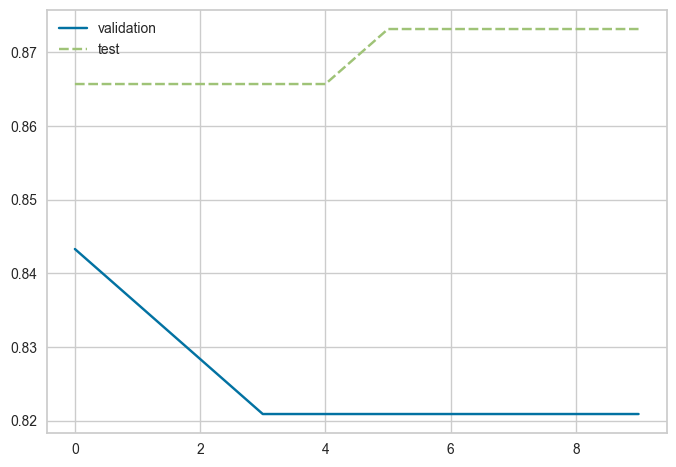

In [69]:
#display validation and test scores on line plot
sns.lineplot(df_svm_scores)
plt.show()

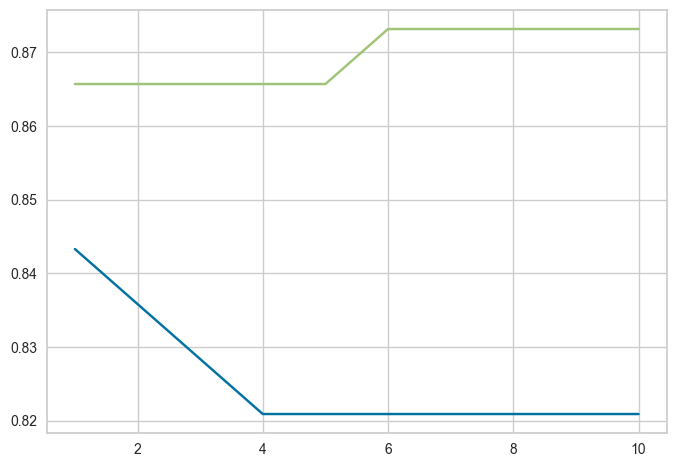

In [70]:
sns.lineplot(x= range(1, 11),y=svm_score[0])
sns.lineplot(x= range(1, 11),y=svm_score[1])
plt.show()

In [71]:
print(f'validation score: {svm_score[0][7]}')
print(f'test score: {svm_score[1][7]}')

validation score: 0.8208955223880597
test score: 0.8731343283582089


In [72]:
#save predictions to csv
y_pred = svm.predict(X_test_scaled.drop(['Survived', 'other'], axis=1))
submission = pd.DataFrame({'PassengerId': test_data.drop('Survived', axis=1).index, 'Survived': y_pred})
submission['Survived'] = submission['Survived'].astype(int)
submission.to_csv('submission_svm2.csv', index=False)

c:\Users\omarmosaad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


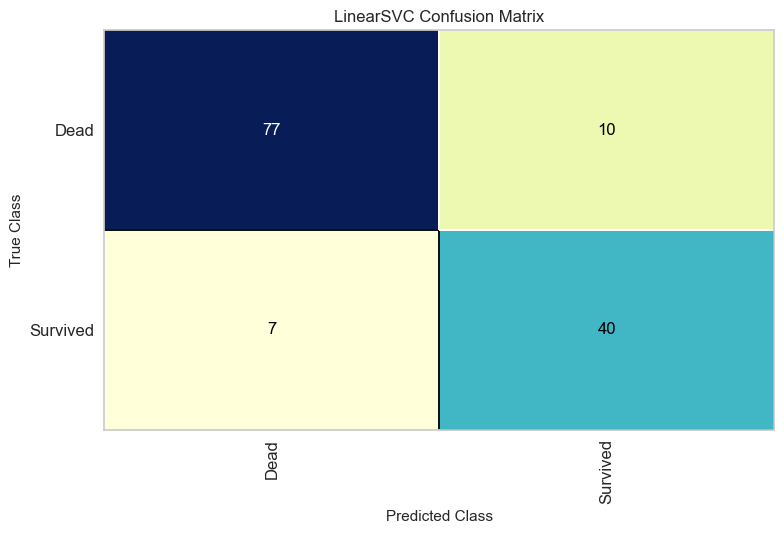

<Axes: title={'center': 'LinearSVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [73]:
visualizer = ConfusionMatrix(svm, classes=['Dead', 'Survived'], cmap='YlGnBu')

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

c:\Users\omarmosaad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


0.8731343283582089


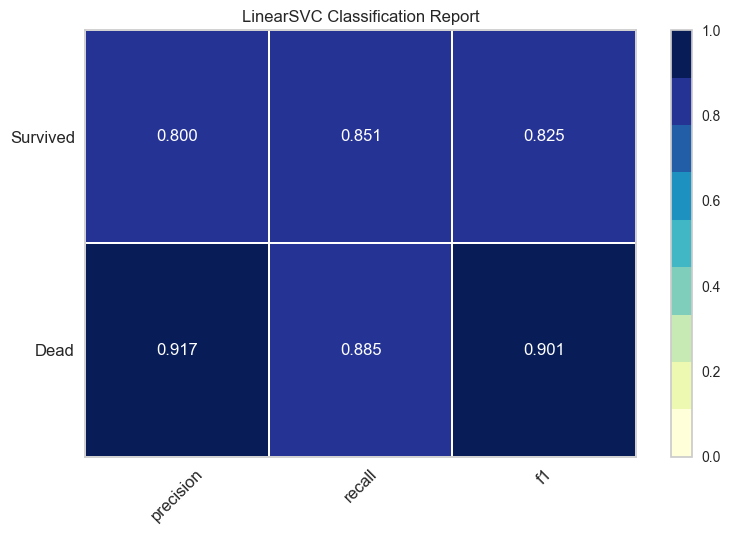

<Axes: title={'center': 'LinearSVC Classification Report'}>

In [74]:
visualizer = ClassificationReport(svm, classes=['Dead', 'Survived'], cmap='YlGnBu')
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
print(visualizer.score(X_test, y_test))       # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

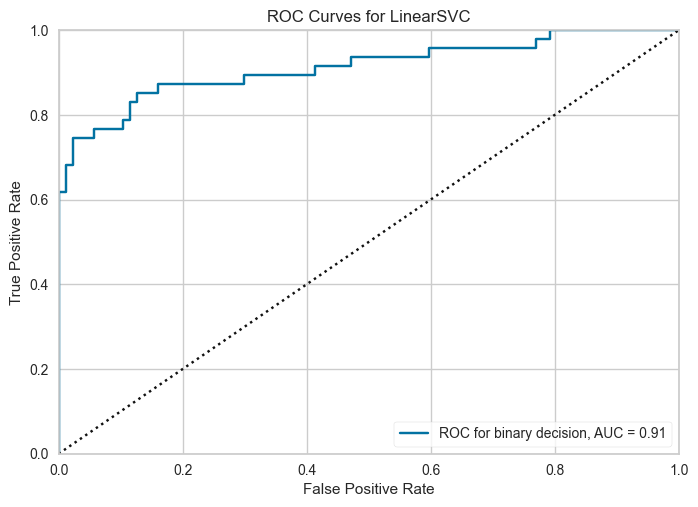

<Axes: title={'center': 'ROC Curves for LinearSVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [75]:
visualizer = ROCAUC(LinearSVC(C=0.1, dual=False), classes=['Dead', 'Survived'], cmap='YlGnBu',binary=True)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()             

## Naive Bayes

In [76]:

gnb = GaussianNB()

gnb.fit(X_train, y_train)

print(f"Validation Accuracy: {gnb.score(X_valid, y_valid):.2f}")

print(f"Test Accuracy: {gnb.score(X_test, y_test):.2f}")


Validation Accuracy: 0.78
Test Accuracy: 0.86


c:\Users\omarmosaad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


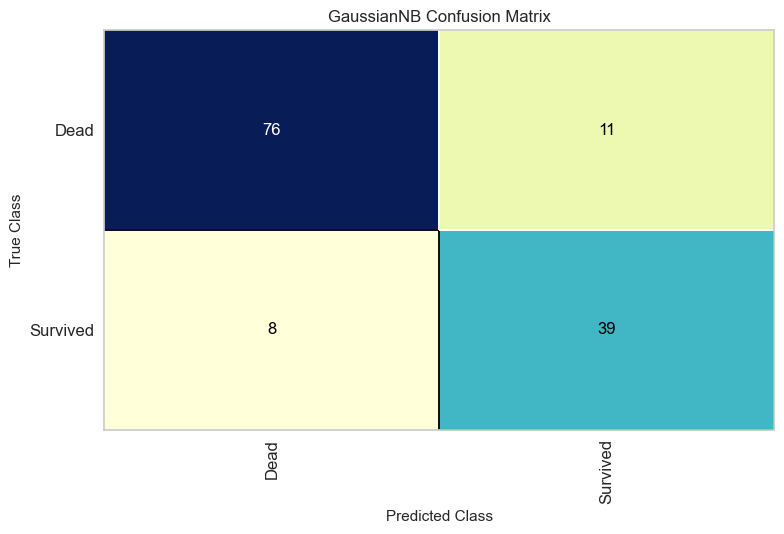

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [77]:
visualizer = ConfusionMatrix(gnb, classes=['Dead', 'Survived'], cmap='YlGnBu')

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

c:\Users\omarmosaad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


0.8582089552238806


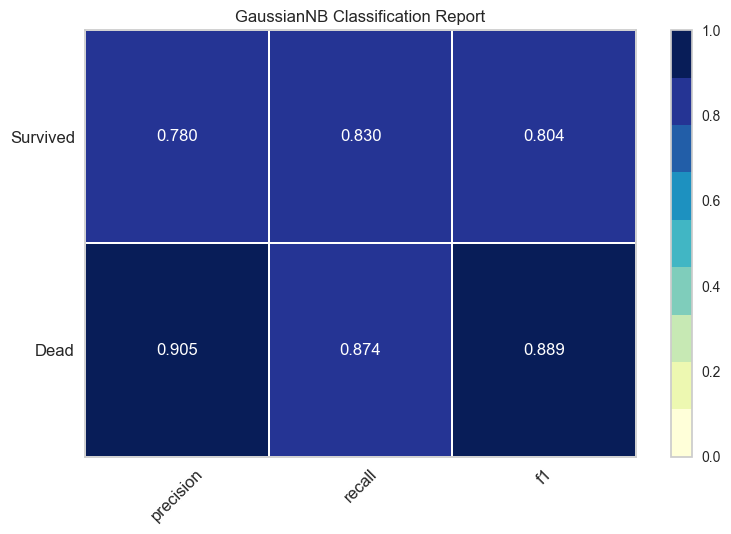

<Axes: title={'center': 'GaussianNB Classification Report'}>

In [78]:
visualizer = ClassificationReport(gnb, classes=['Dead', 'Survived'], cmap='YlGnBu')
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
print(visualizer.score(X_test, y_test))       # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

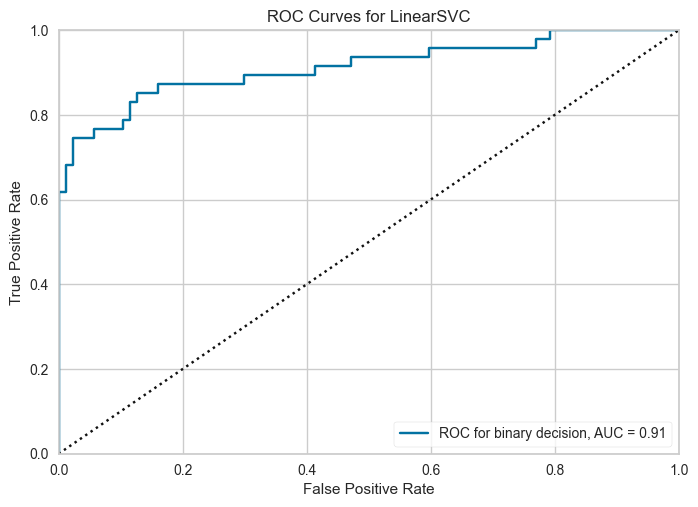

<Axes: title={'center': 'ROC Curves for LinearSVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [79]:
visualizer = ROCAUC(LinearSVC(C=0.1, dual=False), classes=['Dead', 'Survived'], cmap='YlGnBu',binary=True)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()             

In [85]:
#save predictions to csv
y_pred = gnb.predict(X_test_imputed.drop(['Survived','other'], axis=1))
submission = pd.DataFrame({'PassengerId': test_data.drop('Survived', axis=1).index, 'Survived': y_pred})
submission['Survived'] = submission['Survived'].astype(int)
submission.to_csv('submission_nb.csv', index=False)

In [86]:
kn_scores=[]
for i in range(2, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    kn_scores.append(knn.score(X_test, y_test))

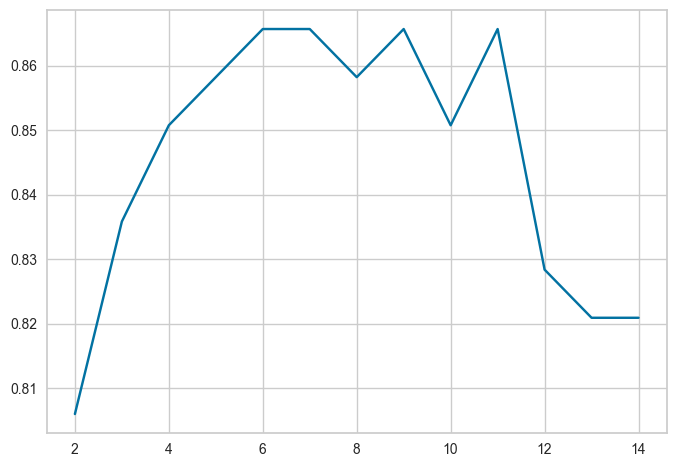

In [87]:
sns.lineplot(x= range(2, 15, 1),y=kn_scores)
plt.show()

In [88]:
#split the data into train validation and test
X_train, X_temp, y_train, y_temp = train_test_split(X_train_scaled.drop(['Survived'], axis = 1), X_train_scaled['Survived'],train_size=0.7, test_size=0.3, shuffle=False)

X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp,train_size=0.5, test_size=0.5, shuffle=False)

In [89]:
knn_score = [[], []]
for i in range(2, 15, 1):

    knn = KNeighborsClassifier(n_neighbors=i, p=1,)
    knn.fit(X_train, y_train)
    knn_score[0].append(knn.score(X_valid, y_valid))
    knn_score[1].append(knn.score(X_test, y_test))



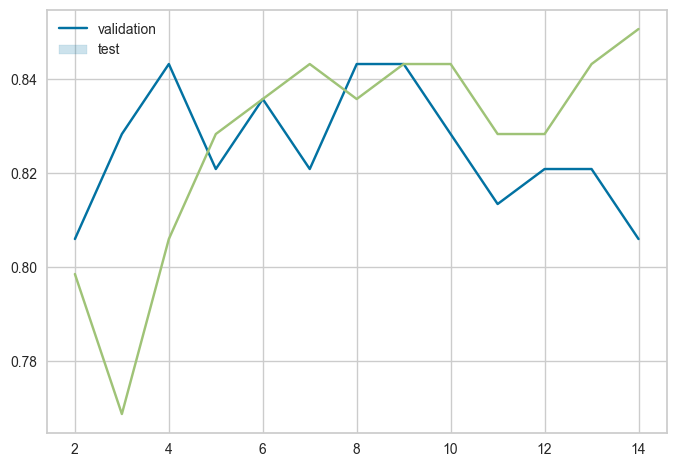

In [90]:
sns.lineplot(x= range(2, 15),y=knn_score[0])
sns.lineplot(x= range(2, 15),y=knn_score[1])
plt.legend(['validation', 'test'])
plt.show()

In [91]:
print(f'validation score: {knn_score[0][6]}')
print(f'test score: {knn_score[1][6]}')


validation score: 0.8432835820895522
test score: 0.835820895522388


In [92]:
knn = KNeighborsClassifier(n_neighbors=8, p=1)
knn.fit(X_train, y_train)

knn.score(X_test, y_test)

0.835820895522388

c:\Users\omarmosaad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


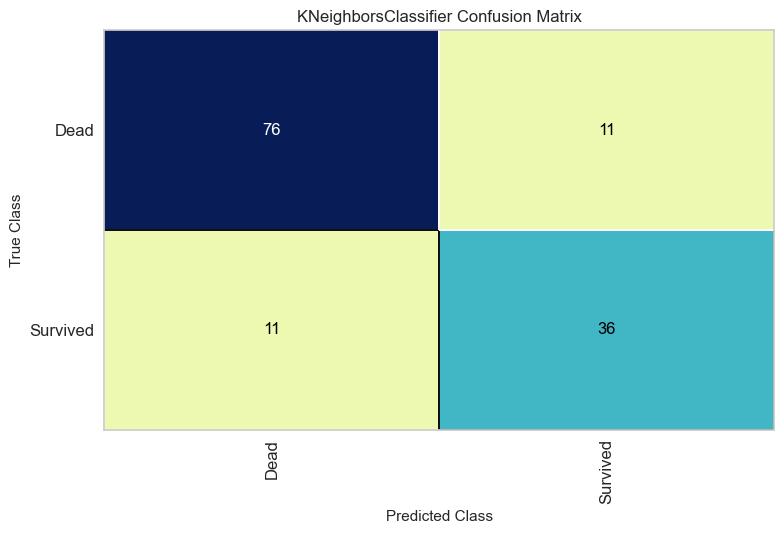

<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [93]:
visualizer = ConfusionMatrix(knn, classes=['Dead', 'Survived'], cmap='YlGnBu')

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

c:\Users\omarmosaad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.835820895522388


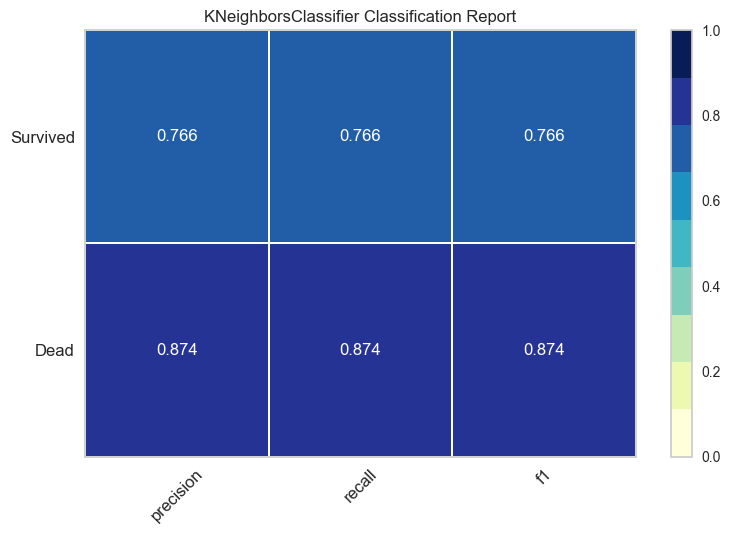

<Axes: title={'center': 'KNeighborsClassifier Classification Report'}>

In [94]:
visualizer = ClassificationReport(knn, classes=['Dead', 'Survived'], cmap='YlGnBu')
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
print(visualizer.score(X_test, y_test))       # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

c:\Users\omarmosaad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


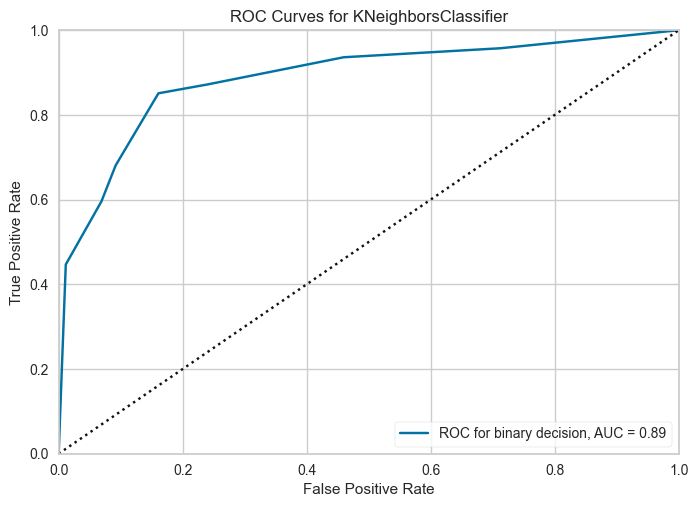

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [95]:
visualizer = ROCAUC(knn, classes=['Dead', 'Survived'], cmap='YlGnBu',binary=True)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()             

In [96]:
#save predictions to csv
y_pred = knn.predict(X_test_imputed.drop('Survived', axis=1))
submission = pd.DataFrame({'PassengerId': test_data.drop('Survived', axis=1).index, 'Survived': y_pred})
submission['Survived'] = submission['Survived'].astype(int)
submission.to_csv('submission_knn_5.csv', index=False)

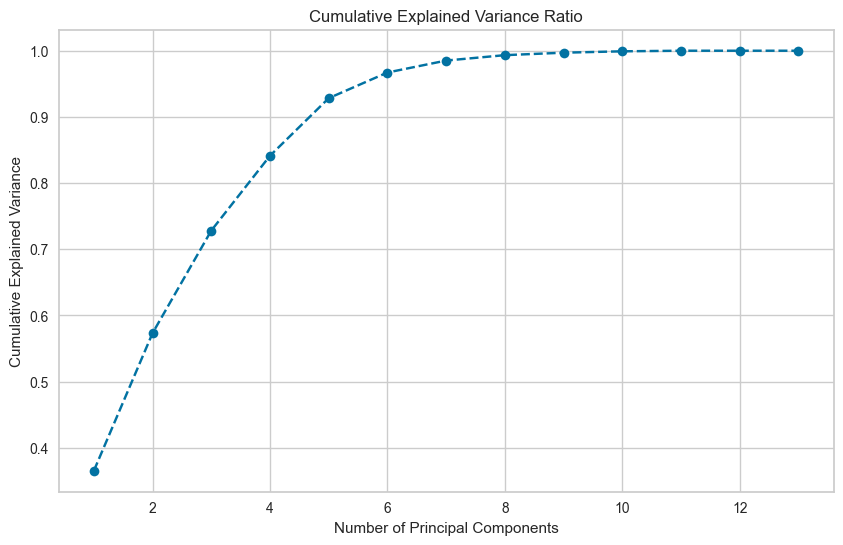

In [97]:
pca = PCA()
X_pca = pca.fit_transform(X_train_scaled.drop(['Survived'], axis = 1))

# Visualize explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [98]:
X_pca.shape

(891, 13)

In [99]:
pca = PCA(n_components=6, )
X_pca = pca.fit_transform(X_train_scaled.drop(['Survived'], axis = 1))

In [100]:
#split the data into train validation and test
X_train, X_temp, y_train, y_temp = train_test_split(X_pca, X_train_scaled['Survived'],train_size=0.7, test_size=0.3, shuffle=False)

X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp,train_size=0.5, test_size=0.5, shuffle=False)

In [101]:

gnb = GaussianNB()

gnb.fit(X_train, y_train)

print(f"Validation Accuracy: {gnb.score(X_valid, y_valid):.2f}")

print(f"Test Accuracy: {gnb.score(X_test, y_test):.2f}")


Validation Accuracy: 0.78
Test Accuracy: 0.82


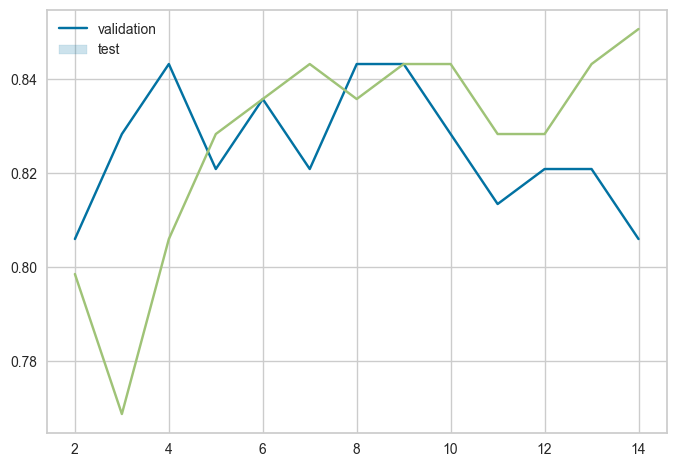

In [102]:
sns.lineplot(x= range(2, 15),y=knn_score[0])
sns.lineplot(x= range(2, 15),y=knn_score[1])
plt.legend(['validation', 'test'])
plt.show()